# Предобработка данных

## Работа с пропусками

### NaN и None

####  уникальные значения и количество их упоминаний

In [1]:
import pandas as pd
logs = pd.read_csv('logs.csv')
print(logs['source'].value_counts()) 

other      133834
context     52032
email       12279
None         1674
undef         181
Name: source, dtype: int64


#### Методом `isna()` найдём все строки с пропусками в столбце email и просмотрим первые пять.

In [2]:
print(logs[logs['email'].isna()].head())

      user_id   source email  purchase
0  7141786820    other   NaN         0
2  1914055396  context   NaN         0
3  4099355752    other   NaN         0
4  6032477554  context   NaN         1
5  5872473344    other   NaN         0


#### сосчитать строки без email-адресов, вызовем функцию `len()`.

In [3]:
print(len(logs[logs['email'].isna()]))

186047


#### заполнять пропуски в данных методом `fillna()`

In [5]:
logs.fillna('example@example.com').head() 

,user_id,source,email,purchase
0,7141786820,other,example@example.com,0
1,5644686960,email,c129aa540a,0
2,1914055396,context,example@example.com,0
3,4099355752,other,example@example.com,0
4,6032477554,context,example@example.com,1


### Логические выражения в атрибуте loc

Если мы хотим изменить значения в таблице, подойдет только полная запись с `loc`.

In [13]:
# import pandas as pd

# data = pd.read_csv('/datasets/projects.csv')
# rows = (data['Новая функция'] == '+') & (data['Роль'] == 'разработчик')
# data.loc[rows, 'Новая функция'] = '-'
# print(data)

### Работа с пропусками в категориальных переменных

Вызовем метод `agg()`, указывающий, какие именно функции применить к столбцу 'purchase'. Название столбца и сами функции запишем в особую структуру данных — словарь. Словарь состоит из ключа и значения:`
{'purchase': ['count','sum']}`

In [8]:
logs_grouped = logs.groupby('source').agg({'purchase': ['count', 'sum']}) 
logs_grouped 

purchase      
           count   sum
source                
None        1674   108
context    52032  3029
email      12279   913
other     133834  8041
undef        181    12

### Работа с пропусками в количественных переменных

среднее время пребывания на сайте пользователей мобильных платформ.

In [10]:
import pandas as pd

metrica = pd.read_csv('metrica_data.csv')
mobile_data = metrica[metrica['device_type'] == 'mobile']
#print(mobile_data.head(5))
mobile_data_time_avg = mobile_data['time'].mean()
print(mobile_data_time_avg)

41.15691239238949


### Заполнение пропусков в количественных переменных по категориям

In [12]:
# импортируем библиотеку pandas
import pandas as pd

# создаём датафрейм metrica из CSV-файла
metrica = pd.read_csv('metrica_data.csv')

# перебираем каждый тип девайса в наборе уникальных значений столба device_type
for d in metrica['device_type'].unique():
    # на каждом шаге цикла с помощью атрибута loc выбираем строки,
    # в которых в device_type текущий тип девайса (d) и есть пропуски в time 
    metrica.loc[(metrica['device_type'] == d) & (metrica['time'].isna()), 'time'] = \
    metrica.loc[(metrica['device_type'] == d), 'time'].mean()
    # и записываем в них среднее значение time среди строк с текущим типом девайса (d)

# проверяем, что все пропуски заполнены
print(metrica['time'].isna().sum())

0


## Изменение типов данных

## Поиск дубликатов

## Категоризация данных

### Гистограмма частот

# Исследовательский анализ данных

## Первые графики и выводы

## Изучение срезов данных

## Работа с несколькими источниками данных

## Взаимосвязь данных

## Валидация результатов

# Статистический анализ данных

## Описательная статистика

## Теория вероятностей

## Проверка гипотез

<AxesSubplot:>

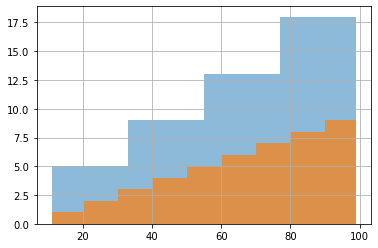

In [4]:
import pandas as pd

data = pd.Series([11, 20, 22, 31, 32, 33, 41, 42, 43, 44, 51, 52, 53, 54, 55, 61, 62, 63, 64, 65, 66, 71, 72, 73, 74, 75, 76, 77, 81, 82, 83, 84, 85, 86, 87, 88, 91, 92, 93, 94, 95, 96, 97, 98, 99])

data.hist(bins=4, alpha=0.5)  # строим гистограмму с 4 корзинами

data.hist(
    bins=[11, 20, 30, 40, 50, 60, 70, 80, 90, 99], alpha=0.7
)  # строим гистограмму с 9 корзинами, границы которых перечислены в списке

## Обман гистограмм

<AxesSubplot:>

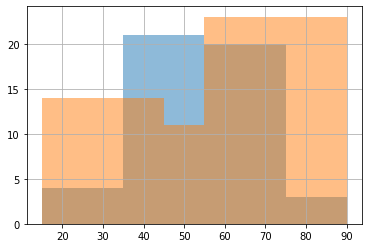

In [5]:
import pandas as pd

# назовем датасет pur_time от англ. purchase time, «время покупки»
pur_time = pd.Series([36, 44, 73, 32, 44, 29, 63, 60, 55, 74, 61, 26, 76, 40, 39, 28, 69, 61, 54, 58, 47, 41, 70, 51, 58, 36, 71, 47, 74, 59, 50, 78, 59, 48, 67, 53, 67, 52, 38, 55, 53, 53, 43, 77, 44, 63, 63, 54])

pur_time.hist(
    bins=[15, 35, 55, 75, 90], alpha=0.5
)


pur_time.hist(
    bins=[15, 45, 55, 90], alpha=0.5
)

# Статистика

## Дисперсия

Дисперсию совокупности рассчитывают методом **var()** (от англ. variance — «дисперсия»):

In [6]:
import numpy as np

x = [1, 2, 3, 4, 5, 6] # совокупность
variance = np.var(x)
print(variance)

2.9166666666666665


Если известно, что датасет — не вся совокупность, а выборка из неё, вместо дисперсии считают её оценку по имеющейся выборке (то есть s², а не σ²). Для этого в методе **var()** указывают параметр **ddof=1** :

In [8]:
import numpy as np

x = [1, 2, 3, 4, 5, 6] # выборка
variance_estimate = np.var(x, ddof=1)
print(variance_estimate)

3.5


Стандартное отклонение находят методом `std()` (от англ. standard deviation, «стандартное отклонение») из библиотеки NumPy:

In [9]:
import numpy as np

x = [1, 2, 3, 4, 5, 6]  # совокупность
standard_deviation = np.std(x)
print(standard_deviation)

1.707825127659933


In [10]:
import numpy as np

x = [1, 2, 3, 4, 5, 6] # выборка
standard_deviation = np.std(x, ddof=1)
print (standard_deviation)

1.8708286933869707


Если дисперсия известна заранее, можно применить метод `sqrt()` (от англ. square root, «квадратный корень») из библиотеки NumPy. Корень из дисперсии будет равен стандартному отклонению:

In [11]:
import numpy as np

variance = 2.9166666666666665
standard_deviation = np.sqrt(variance)
print(standard_deviation)

1.707825127659933


# Теория вероятностей

In [2]:
import numpy as np
spots = np.array([[2,3,4,5,6,7], # имя переменной spots по-английски значит «пятна»
    [3,4,5,6,7,8], 
    [4,5,6,7,8,9], 
    [5,6,7,8,9,10], 
    [6,7,8,9,10,11],
    [7,8,9,10,11,12]]) 
spot_counts = {}

for i in range(0, 6):
        for j in range(0, 6):
                if spots[i][j] not in spot_counts.keys():
                        spot_counts[spots[i][j]] = 1
                else:
                        spot_counts[spots[i][j]] += 1

print(spot_counts) 

{2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 5, 9: 4, 10: 3, 11: 2, 12: 1}


In [3]:
spot_probs={k:spot_counts[k]/36 for k in spot_counts}
print(spot_probs) 

{2: 0.027777777777777776, 3: 0.05555555555555555, 4: 0.08333333333333333, 5: 0.1111111111111111, 6: 0.1388888888888889, 7: 0.16666666666666666, 8: 0.1388888888888889, 9: 0.1111111111111111, 10: 0.08333333333333333, 11: 0.05555555555555555, 12: 0.027777777777777776}


<AxesSubplot:>

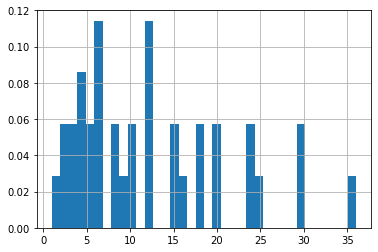

In [4]:
import pandas as pd

x = pd.Series([1, 2, 3, 4, 5, 6, 2, 4, 6, 8, 10, 12, 3, 6, 9, 12, 15, 18, 4, 8, 12, 16, 20, 24, 5, 10, 15, 20, 25, 30, 6, 12, 18, 24, 30, 36])
x.hist(density=True, bins=36) 

Аргумент *density* со значением *True* нужен для построения гистограммы плотности вероятностей. Количество корзин равно количеству значений — это значит, что по вертикальной оси будут вероятности для каждого значения.

## Математическое ожидание

In [1]:
x_probs = {
        '3': 0.1,
        '4': 0.2,
        '5' : 0.2,
        '7' : 0.3,
        '11' : 0.1,
        '16' : 0.05,
        '18': 0.05    
}
# E(X): для каждого элемента словаря вычисляем произведение вероятности и значения 
# случайной величины (целочисленное представление ключа словаря):
expectation = sum([int(x_i)*x_probs[x_i] for x_i in x_probs]) 
print(expectation)

7.000000000000001


In [2]:

x_probs = {
    '3': 0.1,
    '4': 0.2,
    '5': 0.2,
    '7': 0.3,
    '11': 0.1,
    '16': 0.05,
    '18': 0.05
}
# E(X): для каждого элемента словаря вычисляем произведение вероятности и значения
# случайной величины (целочисленное представление ключа словаря):
expectation = sum([int(x_i) * x_probs[x_i] for x_i in x_probs])
# (E(X))^2
square_of_expectation = expectation ** 2
# E(X^2)
expectation_of_squares = sum(
    [int(x_i) * int(x_i) * x_probs[x_i] for x_i in x_probs]
)
variance = expectation_of_squares - square_of_expectation
print(variance)

15.899999999999991


<BarContainer object of 6 artists>

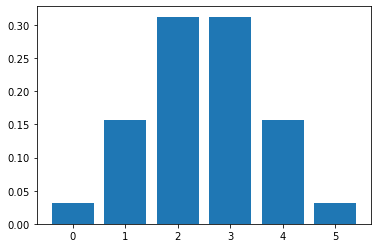

In [5]:
from matplotlib import pyplot as plt
from math import factorial

n = 5
p = 0.5

distr = []

for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p ** k * (1 - p) ** (n - k)
    distr.append(prob)

plt.bar(range(0, n + 1), distr)

In [9]:
from math import factorial

c = factorial(14) / (factorial(3) * factorial(11))
print(c)

364.0


<BarContainer object of 26 artists>

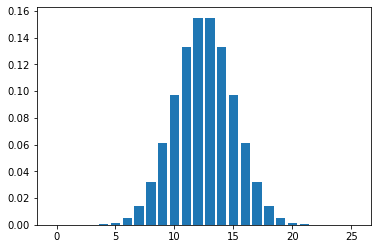

In [6]:
from matplotlib import pyplot as plt
from math import factorial

n = 25
p = 0.5

distr = []

for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p ** k * (1 - p) ** (n - k)
    distr.append(prob)

plt.bar(range(0, n + 1), distr)

<BarContainer object of 31 artists>

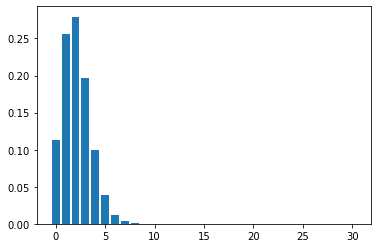

In [8]:
from matplotlib import pyplot as plt
from math import factorial

n = 30
p = 0.07

distr = []

for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p ** k * (1 - p) ** (n - k)
    distr.append(prob)

plt.bar(range(0, n + 1), distr)

## Нормальное распределение

In [10]:
from scipy import stats as st

# задаём нормальное распределение с математическим ожиданием 1000 
# и стандартным отклонением 100
distr = st.norm(1000, 100) 

x = 1000

result = distr.cdf(x) # считаем вероятность получить значение x 
print(result)

0.5


### найти вероятность попасть между значениями

In [11]:
from scipy import stats as st

distr = st.norm(1000, 100) 

x1 = 900
x2 = 1100

result = distr.cdf(x2) - distr.cdf(x1)
print(result)#

0.6826894921370859


### значение по вероятности

In [12]:
from scipy import stats as st

distr = st.norm(1000, 100) 

p1 = 0.841344746

result = distr.ppf(p1)
print(result)

1099.999999971673


### Сравним биномиальное с нормальным распределением

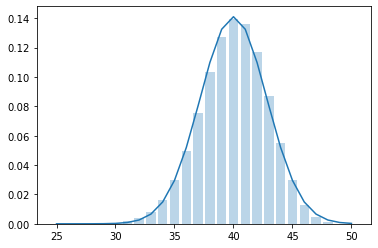

In [19]:
from matplotlib import pyplot as plt
from math import factorial
from scipy.stats import norm
import scipy.stats

# Биномиальное распределение
p = 0.8
n = 50

binom = []
for k in range(0,n+1):
    choose = factorial(n)/(factorial(k) * factorial(n-k))
    prob = choose * p**k * (1-p)**(n-k) 
    binom.append(prob)

# Нормальное распределение
mu = n * p
var = n * p * (1-p)
sigma = var ** .5

x = range(25, n+1)
  
plt.bar(range(25, n + 1), binom[25:], alpha=0.3)
plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma))
plt.show()

### Найдём вероятность получить 715715 кликов или меньше, применив метод `cdf()`:

In [20]:
from scipy import stats as st
import math as mt

binom_n = 5000
binom_p = 0.15

bloger_clicks = 715

mu = binom_n * binom_p
sigma = mt.sqrt(binom_n * binom_p * (1 - binom_p))

p_clicks = st.norm(mu, sigma).cdf(bloger_clicks)
print(p_clicks)

0.08284191945650154

0.08284191945650154


0.08284191945650154

In [14]:
from scipy import stats as st
import pandas as pd

scooters = pd.Series([15, 31, 10, 21, 21, 32, 30, 25, 21,
28, 25, 32, 38, 18, 33, 24, 26, 40, 24, 37, 20, 36, 28, 38,
24, 35, 33, 21, 29, 26, 13, 25, 34, 38, 23, 37, 31, 28, 32,
24, 25, 13, 38, 34, 48, 19, 20, 22, 38, 28, 31, 18, 21, 24,
31, 21, 28, 29, 33, 40, 26, 33, 33,  6, 27, 24, 17, 28,  7,
33, 25, 25, 29, 19, 30, 29, 22, 15, 28, 36, 25, 36, 25, 29,
33, 19, 32, 32, 28, 26, 18, 48, 15, 27, 27, 27,  0, 28, 39,
27, 25, 39, 28, 22, 33, 30, 35, 19, 20, 18, 31, 44, 20, 18,
17, 28, 17, 44, 40, 33,])

optimal_value = 30 # введите ваш код тут

alpha = 0.05 # введите ваш код тут

results =  st.ttest_1samp(scooters, optimal_value)  # введите ваш код тут

print('p-значение:', results.pvalue) # введите ваш код тут)

if results.pvalue < alpha :
      print("Отвергаем нулевую гипотезу")
else:
      print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.00033528259973700724
Отвергаем нулевую гипотезу


In [15]:
from scipy import stats as st
import pandas as pd

screens = pd.Series([4, 2, 4, 5, 5, 4, 2, 3, 3, 5, 2, 5, 2, 2, 2, 3, 3, 4, 8, 3, 4, 3, 5, 5, 4, 2, 5, 2, 3, 7, 5, 5, 6,  5, 3, 4, 3, 6, 3, 4, 4, 3, 5, 4, 4, 8, 4, 7, 4, 5, 5, 3, 4, 6, 7, 2, 3, 6, 5, 6, 4, 4, 3, 4, 6, 4, 4, 6, 2, 6, 5, 3, 3, 3, 4, 5, 3, 5, 5, 4, 3, 3, 3, 1, 5, 4, 3, 4, 6, 3, 1, 3, 2, 7, 3, 6, 6, 6, 5, 5])

prev_screens_value = 4.867

alpha = .05 # уровень статистической значимости

results = st.ttest_1samp(
    screens, 
    prev_screens_value)

# тест односторонний: p-value будет в два раза меньше
print('p-значение:', results.pvalue / 2)

# тест односторонний влево:
# отвергаем гипотезу только тогда, когда выборочное среднее значимо меньше предполагаемого значения
if (results.pvalue / 2 < alpha) and (screens.mean() < prev_screens_value):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

p-значение: 1.3358596895543794e-06
Отвергаем нулевую гипотезу


In [1]:
from scipy import stats as st
import numpy as np

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015, 
            2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785, 
            3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686, 
            1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007, 
            509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066, 
            3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255, 
            1740, 2596]

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


In [4]:
from scipy import stats as st
import numpy as np

before = [157, 114, 152, 355, 155, 513, 299, 268, 164, 320, 
          192, 262, 506, 240, 364, 179, 246, 427, 187, 431, 
          320, 193, 313, 347, 312, 92, 177, 225, 242, 312]

after = [282, 220, 162, 226, 296, 479, 248, 322, 298, 418, 
         552, 246, 251, 404, 368, 484, 358, 264, 359, 410, 
         382, 350, 406, 416, 438, 364, 283, 314, 420, 218]

alpha = .05 # критический уровень статистической значимости

results = st.ttest_rel(
    before, 
    after)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.005825972457958989
Отвергаем нулевую гипотезу


# Калькулятор

In [3]:
p=0.75
q=1-p

In [4]:
q*q

0.0625

In [1]:

from math import factorial
import pandas as pd

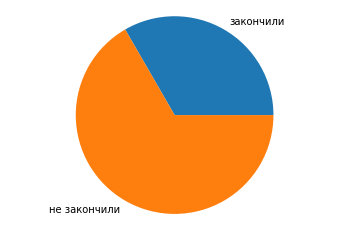

In [10]:
from matplotlib import pyplot as plt

data = {
    'закончили':1,
    'не закончили':2
}

labels = []
sizes = []

for x, y in data.items():
    labels.append(x)
    sizes.append(y)

plt.pie(sizes, labels=labels)

plt.axis('equal')
plt.show()

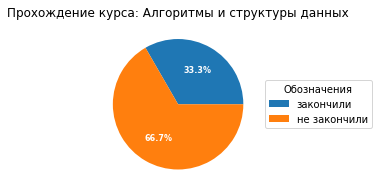

In [16]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

finish = ["закончили",
          "не закончили"]

data = [1,2]


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, finish,
          title="Обозначения",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Прохождение курса: Алгоритмы и структуры данных")

plt.show()

In [1]:
from scipy import stats
from math import sqrt

mean = 89.9
sd = 11.3
n = 20
# степень свободы
df = n - 1
# 95% доверительный интервал
p = 0.95
alpha = 1-p
# стандартная ошибка
se = sd/sqrt(n)

# ppf - Percent point function
# делим на два, так как по умолчанию функция считает для одного конца, а нам надо для двух
t_value = stats.t(df).ppf(1-(alpha/2))

# доверительный интервал 
сonfidence_interval = (mean-t_value*se, mean+t_value*se)
print('[%.2f; %.2f]' % сonfidence_interval)

[84.61; 95.19]


In [2]:
import scipy.stats as st
import math
import numpy as np

x_men_bar = 45
sd_men = 9

x_w_bar = 34
sd_w = 10

n = 100
alpha = 0.95

se = math.sqrt(sd_men**2 / n + sd_w**2 / n)
t = (x_men_bar - x_w_bar) / se

df = n + n - 2

p_value = np.abs(st.t.ppf((1 - alpha) / 2, df))

print(f"""t-value: {t}
p-value for the {alpha * 100}% confidence interval: {p_value}
""")
if t > p_value: 
    print("rejecting the null hypothesis")
elif t < p_value:
    print("acepting the null hypothesis")

t-value: 8.176235608718828
p-value for the 95.0% confidence interval: 1.9720174778338955

rejecting the null hypothesis
